In [1]:
from datasets.get_datasets import *
from revision import *
from boostsrl import boostsrl
import random

## Parameters

In [2]:
target = 'advisedby'
test_size = 0.3
small_train_size = 0.3
validation_size = 0.2
revision_threshold = 0.8
max_revision_iterations = 10

## Dataset

Sameproject, sameperson and samecourse predicates are not being used.

In [3]:
[facts, pos, neg] = get_uwcse_dataset(target, acceptedPredicates=[
'professor',
'student',
'advisedby',
'tempadvisedby',
'ta',
'hasposition',
'publication',
'inphase',
'courselevel',
'yearsinprogram',
'projectmember',
])

## Background  configuration

In [4]:
bk = ['professor(+person).',
'student(+person).',
'advisedby(+person,+person).',
'advisedby(+person,-person).',
'advisedby(-person,+person).',
'tempadvisedby(+person,+person).',
'tempadvisedby(+person,-person).',
'tempadvisedby(-person,+person).',
'ta(+course,+person,+quarter).',
'ta(-course,+person,+quarter).',
'ta(+course,-person,+quarter).',
'ta(+course,+person,-quarter).',
'ta(-course,+person,-quarter).',
'ta(+course,-person,-quarter).',
'hasposition(+person,+faculty).',
'hasposition(+person,-faculty).',
'hasposition(-person,+faculty).',
'publication(+title,+person).',
'publication(+title,-person).',
'publication(-title,+person).',
'inphase(+person,+prequals).',
'inphase(+person,-prequals).',
'inphase(-person,+prequals).',
'courselevel(+course,+level).',
'courselevel(+course,-level).',
'courselevel(-course,+level).',
'yearsinprogram(+person,+year).',
'yearsinprogram(-person,+year).',
'yearsinprogram(+person,-year).',
'projectmember(+project,+person).',
'projectmember(+project,-person).',
'projectmember(-project,+person).']
#'sameproject(project, project).',
#'samecourse(course, course).',
#'sameperson(person, person).',]

background = boostsrl.modes(bk, [target], useStdLogicVariables=False, treeDepth=8, nodeSize=3, numOfClauses=8)

## Sampling examples

In [5]:
# shuffle all examples
random.shuffle(pos)
neg = neg[:len(pos)]
random.shuffle(neg[:len(pos)])

# separate train and test
test_pos = pos[:int(test_size*len(pos))]
test_neg = neg[:int(test_size*len(neg))]
train_pos = pos[int(test_size*len(pos)):]
train_neg = neg[int(test_size*len(neg)):]

# learn from scratch in a small dataset
s_train_pos = train_pos[:int(small_train_size*len(train_pos))]
s_train_neg = train_neg[:int(small_train_size*len(train_neg))]

# shuffle all train examples
random.shuffle(train_pos)
random.shuffle(train_neg)

# train set used in revision and validation set
r_train_pos = train_pos[int(validation_size*len(train_pos)):]
r_train_neg = train_neg[int(validation_size*len(train_neg)):]
validation_pos = train_pos[:int(validation_size*len(train_pos))]
validation_neg = train_neg[:int(validation_size*len(train_neg))]

print('Total examples')
print('Positive examples: %s' % len(pos))
print('Negative examples: %s' % len(neg))
print('\n')
print('Train and test sets from total')
print('Train Positive examples: %s' % len(train_pos))
print('Train Negative examples: %s' % len(train_neg))
print('Test Positive examples: %s' % len(test_pos))
print('Test Negative examples: %s' % len(test_neg))
print('\n')
print('Small dataset')
print('Train Positive examples: %s' % len(s_train_pos))
print('Train Negative examples: %s' % len(s_train_neg))
print('\n')
print('Revision theory train dataset and validation')
print('Train Positive examples: %s' % len(r_train_pos))
print('Train Negative examples: %s' % len(r_train_neg))
print('Validation Positive examples: %s' % len(validation_pos))
print('Validation Negative examples: %s' % len(validation_neg))

Total examples
Positive examples: 113
Negative examples: 113


Train and test sets from total
Train Positive examples: 80
Train Negative examples: 80
Test Positive examples: 33
Test Negative examples: 33


Small dataset
Train Positive examples: 24
Train Negative examples: 24


Revision theory train dataset and validation
Train Positive examples: 64
Train Negative examples: 64
Validation Positive examples: 16
Validation Negative examples: 16


## Learning from small dataset

In [9]:
learn_test_model(background, boostsrl, target, s_train_pos, s_train_neg, facts, test_pos, test_neg, trees=10)

WILL-Produced Tree:
% FOR advisedby(A, B):
%   if ( professor(B) )
%   then if ( publication(C, A), publication(C, D), tempadvisedby(E, D) )
%   | then if ( tempadvisedby(F, B) )
%   | | then if ( publication(G, E) )
%   | | | then if ( publication(C, B) )
%   | | | | then return 3.561524986165039;  // std dev = 0,054, 30,000 (wgt'ed) examples reached here.  /* #pos=30 */
%   | | | | else if ( projectmember(H, B) )
%   | | | | | then return 5.729751546275495;  // std dev = 3,37e-07, 10,000 (wgt'ed) examples reached here.  /* #pos=10 */
%   | | | | | else return 4.6547089027583946;  // std dev = 3,37e-07, 10,000 (wgt'ed) examples reached here.  /* #pos=10 */
%   | | | else if ( ta(I, E, J) )
%   | | | | then return 4.829892954628521;  // std dev = 1,69e-07, 10,000 (wgt'ed) examples reached here.  /* #pos=10 */
%   | | | | else if ( ta(K, F, L) )
%   | | | | | then return -1.3592615164792459;  // std dev = 1,824, 30,000 (wgt'ed) examples reached here.  /* #neg=30 */
%   | | | | | else re

 18.618,
 0.455,
 {'AUC PR': 0.951869,
  'AUC ROC': 0.908632,
  'CLL': -0.263335,
  'F1': 0.918033,
  'Precision': [1.0, 0.5],
  'Recall': 0.848485},
 ['advisedby(A, B)',
  {'': 'professor(B)',
   'true': 'publication(C, A), publication(C, D), tempadvisedby(E, D)',
   'true,true': 'tempadvisedby(F, B)',
   'true,true,true': 'publication(G, E)',
   'true,true,true,false': 'ta(I, E, J)',
   'true,true,true,false,false': 'ta(K, F, L)',
   'true,true,true,true': 'publication(C, B)',
   'true,true,true,true,false': 'projectmember(H, B)'},
  {'false': [0.02, 150, 0],
   'true,false': [0.156, 0, 170],
   'true,true,false': [0.268, 40, 0],
   'true,true,true,false,false,false': [15.553, 20, 10],
   'true,true,true,false,false,true': [1.824, 30, 0],
   'true,true,true,false,true': [1.69e-07, 0, 10],
   'true,true,true,true,false,false': [3.37e-07, 0, 10],
   'true,true,true,true,false,true': [3.37e-07, 0, 10],
   'true,true,true,true,true': [0.054, 0, 30]}]]

## Learning from complete dataset

WILL-Produced Tree:
% FOR advisedby(A, B):
%   if ( professor(B), student(A) )
%   then if ( publication(C, B), publication(C, A) )
%   | then return 3.8410209430497844;  // std dev = 0,062, 280,000 (wgt'ed) examples reached here.  /* #pos=280 */
%   | else if ( publication(D, A), publication(D, E), professor(E) )
%   | | then if ( publication(F, B) )
%   | | | then if ( ta(G, A, H) )
%   | | | | then if ( tempadvisedby(I, B), ta(J, I, H) )
%   | | | | | then return -4.555077164707215;  // std dev = 2,92e-07, 10,000 (wgt'ed) examples reached here.  /* #neg=10 */
%   | | | | | else return 5.0721091709174075;  // std dev = 0,396, 20,000 (wgt'ed) examples reached here.  /* #pos=20 */
%   | | | | else return -0.5881219318434318;  // std dev = 3,203, 70,000 (wgt'ed) examples reached here.  /* #neg=60 #pos=10 */
%   | | | else return 4.165151166989849;  // std dev = 0,101, 40,000 (wgt'ed) examples reached here.  /* #pos=40 */
%   | | else if ( publication(K, A) )
%   | | | then return 4.6463

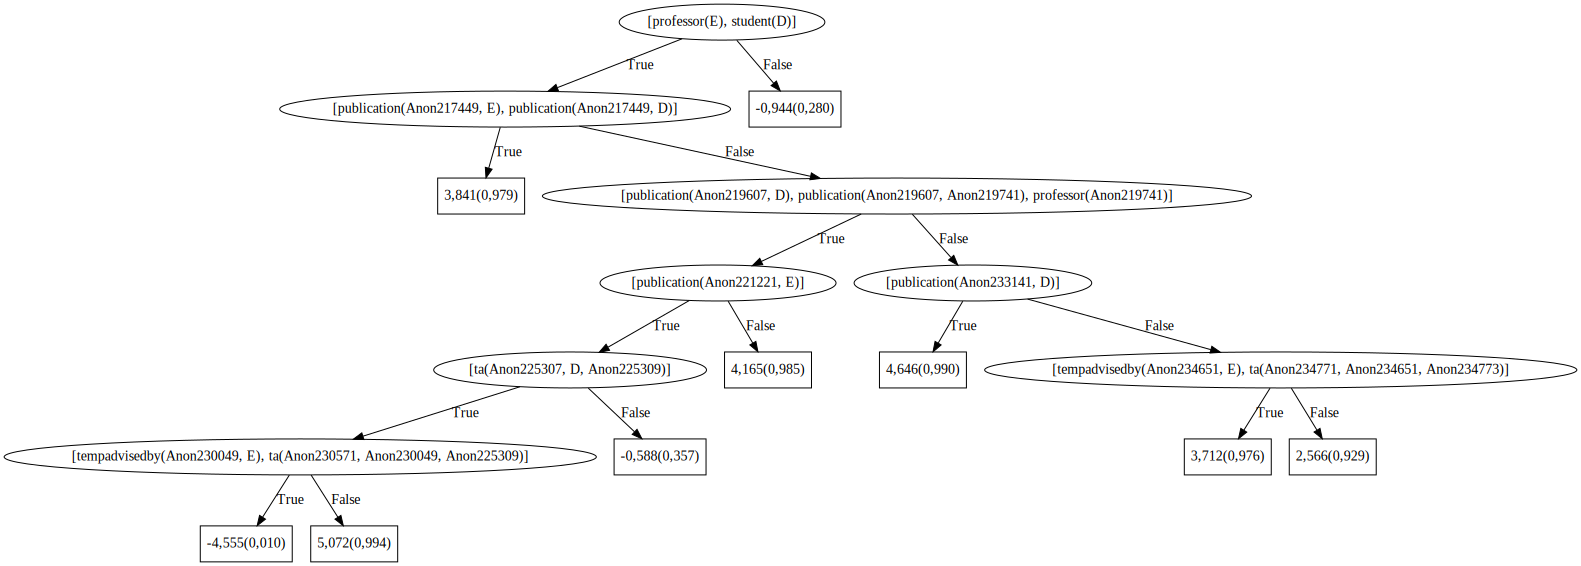

In [13]:
delete_model_files()
model = boostsrl.train(background, train_pos, train_neg, facts, trees=10)
learning_time = model.traintime()
will = model.get_will_produced_tree()
#structured = model.get_structured_tree().copy()
results = boostsrl.test(model, test_pos, test_neg, facts, trees=10)
inference_time = results.testtime()
t_results = results.summarize_results()
print('WILL-Produced Tree:')
print_will_produced_tree(will)
print('\n')
print('Results:')
print(t_results)
print('\n')
print('Total learning time: %s seconds' % learning_time)
print('Total inference time: %s seconds' % inference_time)
print('AUC ROC: %s' % t_results['AUC ROC'])
print('\n')
print('Tree:')
model.tree(0, target, image=True)

## Theory Revision

Performing parameter learning
******************************************
WILL-Produced Tree:
% FOR advisedby(A, B):
%   if ( professor(B) )
%   then if ( tempadvisedby(C, B), publication(D, C) )
%   | then if ( publication(E, A) )
%   | | then return 0.6081489350995123;  // std dev = 1,225, 8,000 (wgt'ed) examples reached here.  /* #neg=2 #pos=6 */
%   | | else return 0.8581489350995121;  // std dev = 2,11e-08, 3,000 (wgt'ed) examples reached here.  /* #pos=3 */
%   | else if ( publication(F, A), publication(F, B) )
%   | | then if ( ta(G, A, H) )
%   | | | then return 0.8581489350995122;  // std dev = 0,000, 4,000 (wgt'ed) examples reached here.  /* #pos=4 */
%   | | | else return 0.7867203636709409;  // std dev = 0,964, 14,000 (wgt'ed) examples reached here.  /* #neg=1 #pos=13 */
%   | | else if ( publication(I, B), publication(I, J), student(J) )
%   | | | then if ( publication(K, A), tempadvisedby(J, L) )
%   | | | | then return -0.14185106490048777;  // std dev = 0,000, 1,000 (wgt

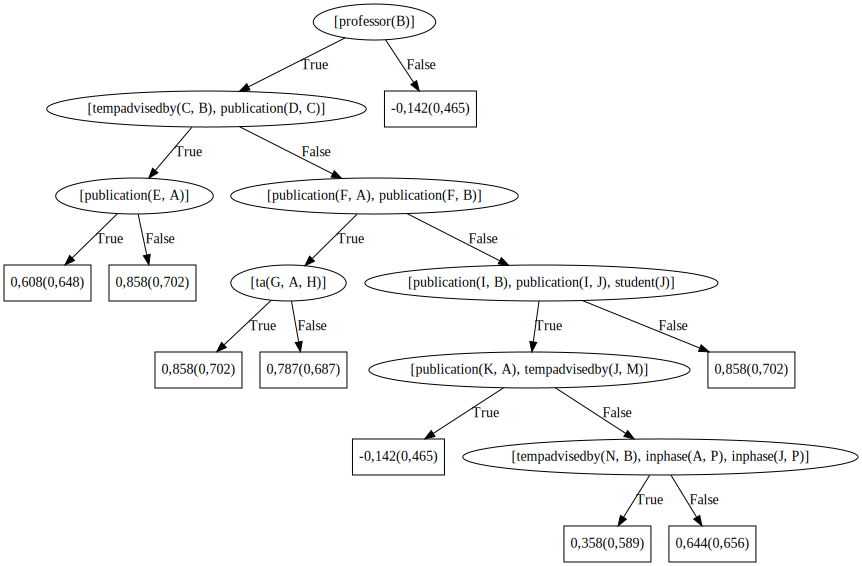

In [12]:
total_revision_time = 0
best_aucroc = 0
best_structured = None

print('Performing parameter learning')
print('******************************************')
delete_model_files()
model = boostsrl.train(background, r_train_pos, r_train_neg, facts, refine=get_refine_file(structured))
learning_time = model.traintime()
will = model.get_will_produced_tree()
structured = model.get_structured_tree().copy()
results = boostsrl.test(model, validation_pos, validation_neg, facts)
inference_time = results.testtime()
t_results = results.summarize_results()
total_revision_time += learning_time + inference_time
print('WILL-Produced Tree:')
print_will_produced_tree(will)
print('\n')
print('Results:')
print(t_results)
print('\n')
print('Total learning time: %s seconds' % learning_time)
print('Total inference time: %s seconds' % inference_time)
print('AUC ROC: %s' % t_results['AUC ROC'])
print('\n')
#print('Tree:')
#model.tree(0, target, image=True)

best_aucroc = t_results['AUC ROC']
best_structured = structured.copy()
save_model_files()

for i in range(max_revision_iterations):
    print('Refining iteration %s' % str(i+1))
    print('******************************************')
    found_better = False
    for candidate in get_cantidates(best_structured, revision_threshold):
        print('Refining node candidate')
        print('******************************************')
        delete_model_files()
        model = boostsrl.train(background, r_train_pos, r_train_neg, facts, refine=candidate)
        learning_time = model.traintime()
        will = model.get_will_produced_tree()
        results = boostsrl.test(model, validation_pos, validation_neg, facts)
        inference_time = results.testtime()
        t_results = results.summarize_results()
        total_revision_time += learning_time + inference_time
        print('WILL-Produced Tree:')
        print_will_produced_tree(will)
        print('\n')
        print('Results:')
        print(t_results)
        print('\n')
        print('Total learning time: %s seconds' % learning_time)
        print('Total inference time: %s seconds' % inference_time)
        print('AUC ROC: %s' % t_results['AUC ROC'])
        print('\n')
        #print('Tree:')
        #model.tree(0, target, image=True)
        print('******************************************')

        if t_results['AUC ROC'] > best_aucroc:
            found_better = True
            best_aucroc = t_results['AUC ROC']
            best_structured = model.get_structured_tree().copy()
            save_model_files()
    print('Best Tree AUC ROC so far: %s' % best_aucroc)
    print('******************************************\n')
    if found_better == False:
        break

print('******************************************')
delete_model_files()
get_saved_model_files()
delete_test_files()
print('Total revision time: %s' % total_revision_time)
print('Best validation AUC ROC: %s' % best_aucroc)
will = model.get_will_produced_tree()
results = boostsrl.test(model, test_pos, test_neg, facts)
inference_time = results.testtime()
t_results = results.summarize_results()
print('WILL-Produced Tree:')
print_will_produced_tree(will)
print('\n')
print('Results:')
print(t_results)
print('\n')
print('Total inference time: %s seconds' % inference_time)
print('AUC ROC: %s' % t_results['AUC ROC'])
print('\n')
print('Tree:')
model.tree(0, target, image=True)